In [1]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('/home/kino/work/00_HEA/python_module')

from hea4f3 import Hea4Feature3data

g_calctype="asa"
g_polytype="fcc"

g_hea4 = Hea4Feature3data(g_calctype)

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


In [2]:
from Common import make_features

g_features = make_features(["row_distribution_mean","ofv_mean"])

features
41
['row1_mean', 'row2_mean', 'row3_mean', 'row4_mean', 'row5_mean', 'row6_mean', 'row7_mean', 'row8_mean', 'row9_mean', 's1_mean', 's2_mean', 'p1_mean', 'p2_mean', 'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean', 'd2_mean', 'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean', 'd8_mean', 'd9_mean', 'd10_mean', 'f1_mean', 'f2_mean', 'f3_mean', 'f4_mean', 'f5_mean', 'f6_mean', 'f7_mean', 'f8_mean', 'f9_mean', 'f10_mean', 'f11_mean', 'f12_mean', 'f13_mean', 'f14_mean']



In [20]:
from Common import load_save_pickle
status, g_df_calc_polytype_loaded = load_save_pickle("df_extend_{}_{}.pickle".format(g_calctype, g_polytype),
                                                None, action=None)

status, g_df_calc_polytype_loaded.shape

('loaded', (73494, 120))

In [21]:
def add_existend(df, calctype="asa"):
    hea4 = Hea4Feature3data(calctype)
    _df = hea4.add_element_existence_columns(df)
    return _df

g_df_calc_polytype_loaded = add_existend(g_df_calc_polytype_loaded, g_calctype)
g_df_calc_polytype_loaded.shape

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


(73494, 223)

In [22]:
from pymatgen.core import Element
import pandas as pd
import numpy as np

In [23]:
g_df_moment_zero = g_df_calc_polytype_loaded.query(g_hea4.querystr_by_local_moment())
g_df_moment_nonzero = g_df_calc_polytype_loaded.query(g_hea4.querystr_by_local_moment(add_not=True))
g_df_moment_nonzero = g_df_moment_nonzero.query(g_hea4.querystr_by_local_moment(mag_value=5))
g_df_moment_zero.shape, g_df_moment_nonzero.shape


abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01
not (abs(moment1) < 0.01 and abs(moment2) < 0.01 and abs(moment3) < 0.01 and abs(moment4) < 0.01)
abs(moment1) < 5 and abs(moment2) < 5 and abs(moment3) < 5 and abs(moment4) < 5


((52662, 223), (20698, 223))

In [24]:
g_df_feature_target = g_hea4.add_all_local_moments(g_df_moment_nonzero)

adding moment_H z=1, adding moment_He z=2, adding moment_Li z=3, adding moment_Be z=4, adding moment_B z=5, adding moment_C z=6, adding moment_N z=7, adding moment_O z=8, adding moment_F z=9, adding moment_Ne z=10, adding moment_Na z=11, adding moment_Mg z=12, adding moment_Al z=13, adding moment_Si z=14, adding moment_P z=15, adding moment_S z=16, adding moment_Cl z=17, adding moment_Ar z=18, adding moment_K z=19, adding moment_Ca z=20, adding moment_Sc z=21, adding moment_Ti z=22, adding moment_V z=23, adding moment_Cr z=24, adding moment_Mn z=25, adding moment_Fe z=26, adding moment_Co z=27, adding moment_Ni z=28, adding moment_Cu z=29, adding moment_Zn z=30, adding moment_Ga z=31, adding moment_Ge z=32, adding moment_As z=33, adding moment_Se z=34, adding moment_Br z=35, adding moment_Kr z=36, adding moment_Rb z=37, adding moment_Sr z=38, adding moment_Y z=39, adding moment_Zr z=40, adding moment_Nb z=41, adding moment_Mo z=42, adding moment_Tc z=43, adding moment_Ru z=44, adding m

In [25]:
print(*list(g_df_feature_target.columns))

heakey element1 element2 element3 element4 polytyp ewidth edelt conv lattice constant volume moment1 moment2 moment3 moment4 total moment TC(K) resistivity(micro ohm cm) TE(Ry) material name total magnetic moment per volume group_mean row_mean group1_mean group2_mean group3_mean group4_mean group5_mean group6_mean group7_mean group8_mean group9_mean group10_mean group11_mean group12_mean group13_mean group14_mean group15_mean group16_mean group17_mean group18_mean row1_mean row2_mean row3_mean row4_mean row5_mean row6_mean row7_mean row8_mean row9_mean s1_mean s2_mean p1_mean p2_mean p3_mean p4_mean p5_mean p6_mean d1_mean d2_mean d3_mean d4_mean d5_mean d6_mean d7_mean d8_mean d9_mean d10_mean f1_mean f2_mean f3_mean f4_mean f5_mean f6_mean f7_mean f8_mean f9_mean f10_mean f11_mean f12_mean f13_mean f14_mean X_mean atomic_radius_mean atomic_radius_calculated_mean thermal_conductivity_mean boiling_point_mean melting_point_mean molar_volume_mean log_electrical_resistivity_mean group_std

In [26]:
from Common import make_features

g_features = make_features(["basic_mean_std", "basic_min_max",
                            "phys_prop_mean_std", "phys_prop_min_max"])

features
46
['group_mean', 'group_std', 'row_mean', 'group_std', 'group_min', 'group_max', 'row_min', 'group_max', 'X_mean', 'atomic_radius_mean', 'atomic_radius_calculated_mean', 'thermal_conductivity_mean', 'boiling_point_mean', 'melting_point_mean', 'molar_volume_mean', 'log_electrical_resistivity_mean', 'group_std', 'row_std', 'X_std', 'atomic_radius_std', 'atomic_radius_calculated_std', 'thermal_conductivity_std', 'boiling_point_std', 'melting_point_std', 'molar_volume_std', 'log_electrical_resistivity_std', 'group_min', 'row_min', 'X_min', 'atomic_radius_min', 'atomic_radius_calculated_min', 'thermal_conductivity_min', 'boiling_point_min', 'melting_point_min', 'molar_volume_min', 'log_electrical_resistivity_min', 'group_max', 'row_max', 'X_max', 'atomic_radius_max', 'atomic_radius_calculated_max', 'thermal_conductivity_max', 'boiling_point_max', 'melting_point_max', 'molar_volume_max', 'log_electrical_resistivity_max']



In [27]:
import random
random.seed(1)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
import numpy as np

In [29]:
from Common import make_descriptor
from Common import reg_Xy_all, reg_Xy_train_test, reg_Xy_kfold
from Common import plot_y_yp
from Common import do_linear_regression, do_linear_regresson_X2,\
                   do_randomforest_regression, do_kneighbors_regression

In [30]:
# g_df_feature_target["moment_Mn"]

In [31]:
elements_exist = g_hea4.get_existing_elements(g_df_feature_target)
print(elements_exist)
g_target_list = []
for target_z in elements_exist:
    elm = Element('H').from_Z(target_z)
    target_element = str(elm)
    name = "moment_{}".format(target_element)
    g_target_list.append(name)
    
    if False:
        _df = g_df_feature_target[[name]].dropna()
        print(target_element,"shape", _df.shape)
        _df.hist(name, bins=50)
        plt.show()
    
print(g_target_list)

[13 14 21 22 23 24 25 26 27 28 29 30 31 32 39 40 41 42 43 44 45 46 47 48
 49 50 72 73 74 75 76 77 78 79 80 81 82 83]
['moment_Al', 'moment_Si', 'moment_Sc', 'moment_Ti', 'moment_V', 'moment_Cr', 'moment_Mn', 'moment_Fe', 'moment_Co', 'moment_Ni', 'moment_Cu', 'moment_Zn', 'moment_Ga', 'moment_Ge', 'moment_Y', 'moment_Zr', 'moment_Nb', 'moment_Mo', 'moment_Tc', 'moment_Ru', 'moment_Rh', 'moment_Pd', 'moment_Ag', 'moment_Cd', 'moment_In', 'moment_Sn', 'moment_Hf', 'moment_Ta', 'moment_W', 'moment_Re', 'moment_Os', 'moment_Ir', 'moment_Pt', 'moment_Au', 'moment_Hg', 'moment_Tl', 'moment_Pb', 'moment_Bi']


In [33]:
print(*list(g_df_feature_target.columns))


heakey element1 element2 element3 element4 polytyp ewidth edelt conv lattice constant volume moment1 moment2 moment3 moment4 total moment TC(K) resistivity(micro ohm cm) TE(Ry) material name total magnetic moment per volume group_mean row_mean group1_mean group2_mean group3_mean group4_mean group5_mean group6_mean group7_mean group8_mean group9_mean group10_mean group11_mean group12_mean group13_mean group14_mean group15_mean group16_mean group17_mean group18_mean row1_mean row2_mean row3_mean row4_mean row5_mean row6_mean row7_mean row8_mean row9_mean s1_mean s2_mean p1_mean p2_mean p3_mean p4_mean p5_mean p6_mean d1_mean d2_mean d3_mean d4_mean d5_mean d6_mean d7_mean d8_mean d9_mean d10_mean f1_mean f2_mean f3_mean f4_mean f5_mean f6_mean f7_mean f8_mean f9_mean f10_mean f11_mean f12_mean f13_mean f14_mean X_mean atomic_radius_mean atomic_radius_calculated_mean thermal_conductivity_mean boiling_point_mean melting_point_mean molar_volume_mean log_electrical_resistivity_mean group_std

In [34]:
%matplotlib inline

def all_regression(df_feature_target, features, target_list,
                   score_metric_list=["r2","mae"], show_plot = False):
    """execute all the regression and make resulting dict

    Args:
        df_feature_target (DataFrame): data
        features (list): a list of feature names
        target_list (str): a name of target variable

    Returns:
        dict: R2 results for all the regressions.
    """    

    result_dic_all = {}
    for target_name in  target_list:
        result_dic_all[target_name] = {}

    for target_name in  target_list:
        print("target", target_name)
        features_check = features.copy()
        features_check.append(target_name)
        features_check.append("heakey")

        _df = df_feature_target[features_check].dropna()
        print("shape including heakey and target",df_feature_target.shape)
    
        print(target_name)
        result = do_linear_regression(_df, features, target_name,
                                      score_metric_list=score_metric_list,
                                     show_plot=show_plot)
        print("result",result)
        result_dic_all[target_name].update(result)
        result = do_linear_regresson_X2(_df, features, target_name,
                                        score_metric_list=score_metric_list,
                                       show_plot=show_plot)
        print("result",result)
        result_dic_all[target_name].update(result)
        result = do_randomforest_regression(_df, features, target_name,
                                            score_metric_list=score_metric_list,
                                           show_plot=show_plot)
        result_dic_all[target_name].update(result)
        result = do_kneighbors_regression(_df, features, target_name,
                                          score_metric_list=score_metric_list,
                                         show_plot=show_plot)
        result_dic_all[target_name].update(result)
    return result_dic_all

g_result_dic_all = all_regression(g_df_feature_target, g_features, g_target_list)

target moment_Al
shape including heakey and target (20698, 326)
moment_Al
(1425, 62)
r2(train) 0.40237959165335646
fitting done
R2 0.46279974803011403
result {'linear regression, X1, train test split': {'r2': 0.46279974803011403, 'mae': 0.010080002957599787, 'rmse': 0.0137558936920265}}
(1425, 124)
r2(train) 0.6799104839380182
fitting done
R2 0.6007128755971582
result {'linear regression, X1 X2, train test split': {'r2': 0.6007128755971582, 'mae': 0.007570416212237147, 'rmse': 0.011859417546828907}}
(1425, 62)
r2(train) 0.9591602364574792
fitting done
R2 0.7028800965298705
oob score 0.67813871573367
(1425, 62)
r2(train) 0.19916285859176197
fitting done
R2 0.25039069121148794
target moment_Si
shape including heakey and target (20698, 326)
moment_Si
(1702, 62)
r2(train) 0.3842587514776502
fitting done
R2 0.2637130636781101
result {'linear regression, X1, train test split': {'r2': 0.2637130636781101, 'mae': 0.01050387926592216, 'rmse': 0.015267999969288503}}
(1702, 124)
r2(train) 0.524138

r2(train) 0.40234234384638556
fitting done
R2 -79.6991413460527
result {'linear regression, X1, train test split': {'r2': -79.6991413460527, 'mae': 0.0882637925454223, 'rmse': 0.15896160035972967}}
(1652, 124)
r2(train) 0.6116774947728232
fitting done
R2 -110.55558874118209
result {'linear regression, X1 X2, train test split': {'r2': -110.55558874118209, 'mae': 0.06912370170059243, 'rmse': 0.18689747575404042}}
(1652, 62)
r2(train) 0.8875880781778981
fitting done
R2 -74.1458316137995
oob score 0.24586259823099765
(1652, 62)
r2(train) 0.03534943199423113
fitting done
R2 -0.02879530298894628
target moment_Ge
shape including heakey and target (20698, 326)
moment_Ge
(1918, 62)
r2(train) 0.3753790991865057
fitting done
R2 0.330799946194135
result {'linear regression, X1, train test split': {'r2': 0.330799946194135, 'mae': 0.00996904942590954, 'rmse': 0.015058228250133622}}
(1918, 124)
r2(train) 0.5038858765103209
fitting done
R2 0.4572551658966688
result {'linear regression, X1 X2, train te

r2(train) 0.9300037880403745
fitting done
R2 0.3717549316030013
oob score 0.4818934192851785
(2123, 62)
r2(train) 0.21343983343806017
fitting done
R2 0.1917509414774956
target moment_Sn
shape including heakey and target (20698, 326)
moment_Sn
(2207, 62)
r2(train) 0.3486826422838265
fitting done
R2 0.3057634338261873
result {'linear regression, X1, train test split': {'r2': 0.3057634338261873, 'mae': 0.008920961773799774, 'rmse': 0.012607510974616152}}
(2207, 124)
r2(train) 0.5264111555718
fitting done
R2 0.4470118619789025
result {'linear regression, X1 X2, train test split': {'r2': 0.4470118619789025, 'mae': 0.00721203163336892, 'rmse': 0.011252098370111782}}
(2207, 62)
r2(train) 0.9458006836108616
fitting done
R2 0.6458155017252869
oob score 0.6115865866245761
(2207, 62)
r2(train) 0.22585611745210998
fitting done
R2 0.20307671951896622
target moment_Hf
shape including heakey and target (20698, 326)
moment_Hf
(2103, 62)
r2(train) 0.26176362558803035
fitting done
R2 0.32943881754073434

r2(train) 0.19092253407602178
fitting done
R2 0.18689984863513376
target moment_Bi
shape including heakey and target (20698, 326)
moment_Bi
(2612, 62)
r2(train) 0.44055197745212515
fitting done
R2 0.4162027094609796
result {'linear regression, X1, train test split': {'r2': 0.4162027094609796, 'mae': 0.007586208429601119, 'rmse': 0.010919044571540254}}
(2612, 124)
r2(train) 0.5462590838321086
fitting done
R2 0.5273338957337237
result {'linear regression, X1 X2, train test split': {'r2': 0.5273338957337237, 'mae': 0.006560697682656726, 'rmse': 0.009824960905497162}}
(2612, 62)
r2(train) 0.9573036521298557
fitting done
R2 0.6993840043579714
oob score 0.6843531480344223
(2612, 62)
r2(train) 0.4001733702397703
fitting done
R2 0.3813643788497818


In [35]:
def result_to_df(result_dic_all):
    score_list = []
    for target in result_dic_all.keys():
        reg_method_dic = result_dic_all[target]
        for reg_method in reg_method_dic:
            # print(reg_method_dic[reg_method])
            score_dic = reg_method_dic[reg_method]
            for score in score_dic:
                score_list.append([target,reg_method,score,score_dic[score]])
    _df = pd.DataFrame(score_list,
                       columns=['target','reg_method','score_metric','score'])
    #_df.set_index(keys=['reg_method','target','score_metric'], inplace=True)
    return _df

g_df_score_raw = result_to_df(g_result_dic_all)
g_df_score_raw

target                                      reg_method score_metric  \
0    moment_Al         linear regression, X1, train test split           r2   
1    moment_Al         linear regression, X1, train test split          mae   
2    moment_Al         linear regression, X1, train test split         rmse   
3    moment_Al      linear regression, X1 X2, train test split           r2   
4    moment_Al      linear regression, X1 X2, train test split          mae   
..         ...                                             ...          ...   
451  moment_Bi  random forest regression, X1, train test split          mae   
452  moment_Bi  random forest regression, X1, train test split         rmse   
453  moment_Bi    k neighbors regression, X1, train test split           r2   
454  moment_Bi    k neighbors regression, X1, train test split          mae   
455  moment_Bi    k neighbors regression, X1, train test split         rmse   

        score  
0    0.462800  
1    0.010080  
2    0.013756  
3    0.600713  
4    0.007570  
..        ...  
451  0.004425  
452  0.007835  
453  0.381364  
454  0.008101  
455  0.011240  

[456 rows x 4 columns]

In [36]:
# delete linear regression ,X1 X2 
# because the figure is busy if it is included.

g_df_score_raw = g_df_score_raw.query("reg_method!='linear regression, X1 X2, train test split'")

In [37]:
def make_df_for_plot(df_score, target_list, score_metric="r2"):
    target_list = np.unique(df_score["target"].values)
    df_1 = df_score.query("score_metric=='{}'".format(score_metric))
    del df_1["score_metric"]

    df_2 = df_1.set_index(["target","reg_method"])
    df_3_list = []
    for target in target_list:
        df_3 = df_2.loc[target,:]
        df_3.columns=[target]
        df_3_list.append(df_3)
    df_4 = pd.concat(df_3_list, axis=1)
    return df_4


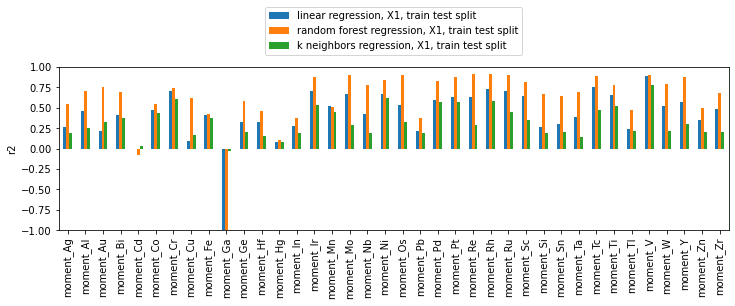

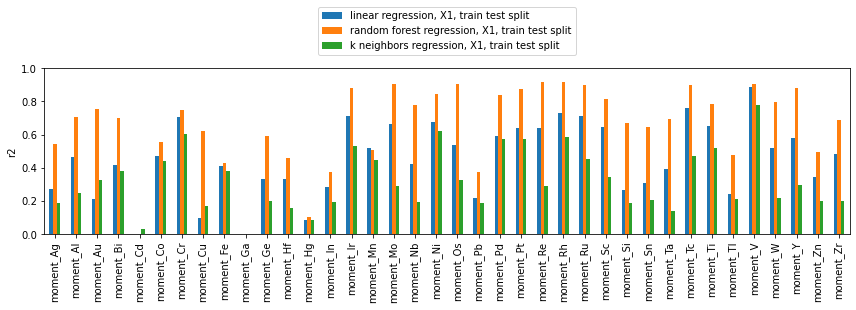

In [46]:
score_metric = "r2"
g_df_score = make_df_for_plot(g_df_score_raw, g_target_list, score_metric=score_metric)

figsize = (12,3)
df = g_df_score.T.plot.bar(figsize=figsize)
plt.legend(loc='upper center' , bbox_to_anchor=(0.5, 1.4))
plt.xticks(rotation=90)
plt.ylabel(score_metric)
plt.ylim((-1,1))
plt.show()

figsize = (12,5)
df = g_df_score.T.plot.bar(figsize=figsize)
plt.legend(loc='upper center' , bbox_to_anchor=(0.5, 1.4))
plt.xticks(rotation=90)
plt.ylabel(score_metric)
plt.ylim((0,1))
plt.tight_layout()
plt.savefig("{}_{}_each_local_magnetic_moment_{}.png".format(g_calctype, g_polytype, score_metric))
plt.show()

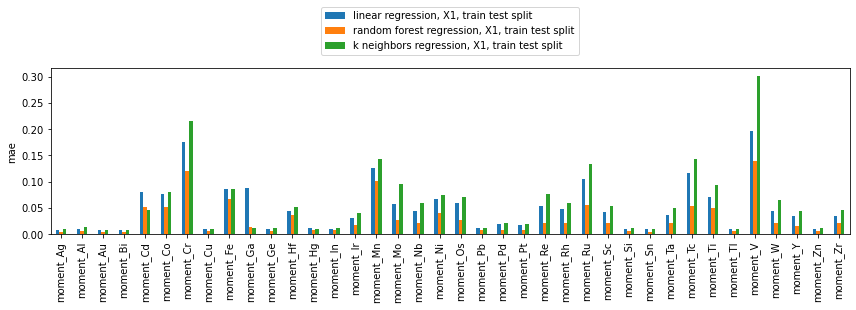

In [45]:
score_metric = "mae"
g_df_score = make_df_for_plot(g_df_score_raw, g_target_list, score_metric=score_metric)

figsize = (12,5)
df = g_df_score.T.plot.bar(figsize=figsize)
plt.legend(loc='upper center' , bbox_to_anchor=(0.5, 1.4))
plt.xticks(rotation=90)
plt.ylabel(score_metric)
plt.tight_layout()
plt.savefig("{}_{}_each_local_magnetic_moment_{}.png".format(g_calctype, g_polytype, score_metric))
plt.show()

総じてrandom forestが良い。 <- 軸に垂直に分類するのが良い。